In [ ]:
import pandas as pd
df = pd.read_csv('/content/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37153,LBN,Asia,Lebanon,2020-10-23,68479.0,1452.0,1195.143,559.0,7.0,7.143,10032.903,212.733,175.101,81.899,1.026,1.047,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,6825442.0,594.561,31.1,8.514,5.430,13367.565,NaN,266.591,12.71,26.9,40.7,NaN,2.9,78.93,0.744
37154,LBN,Asia,Lebanon,2020-10-24,69906.0,1427.0,1231.714,562.0,3.0,6.429,10241.974,209.071,180.459,82.339,0.440,0.942,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,6825442.0,594.561,31.1,8.514,5.430,13367.565,NaN,266.591,12.71,26.9,40.7,NaN,2.9,78.93,0.744
37155,LBN,Asia,Lebanon,2020-10-25,71390.0,1484.0,1300.571,565.0,3.0,6.429,10459.396,217.422,190.548,82.779,0.440,0.942,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,6825442.0,594.561,31.1,8.514,5.430,13367.565,NaN,266.591,12.71,26.9,40.7,NaN,2.9,78.93,0.744
37156,LBN,Asia,Lebanon,2020-10-26,72186.0,796.0,1320.286,579.0,14.0,7.571,10576.018,116.622,193.436,84.830,2.051,1.109,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df["location"].unique

<bound method Series.unique of 0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
37153        Lebanon
37154        Lebanon
37155        Lebanon
37156        Lebanon
37157        Lebanon
Name: location, Length: 37158, dtype: object>

In [ ]:
import pandas as pd
df2=pd.read_csv("/content/complete.csv")
 
 
df2

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [ ]:
date = '2020-08-06' #@param {type:"date"}
df3=df2[df2["Date"]==date]
df3["Date"].unique()

array(['2020-08-06'], dtype=object)

In [ ]:
?matplotlib.rc()


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


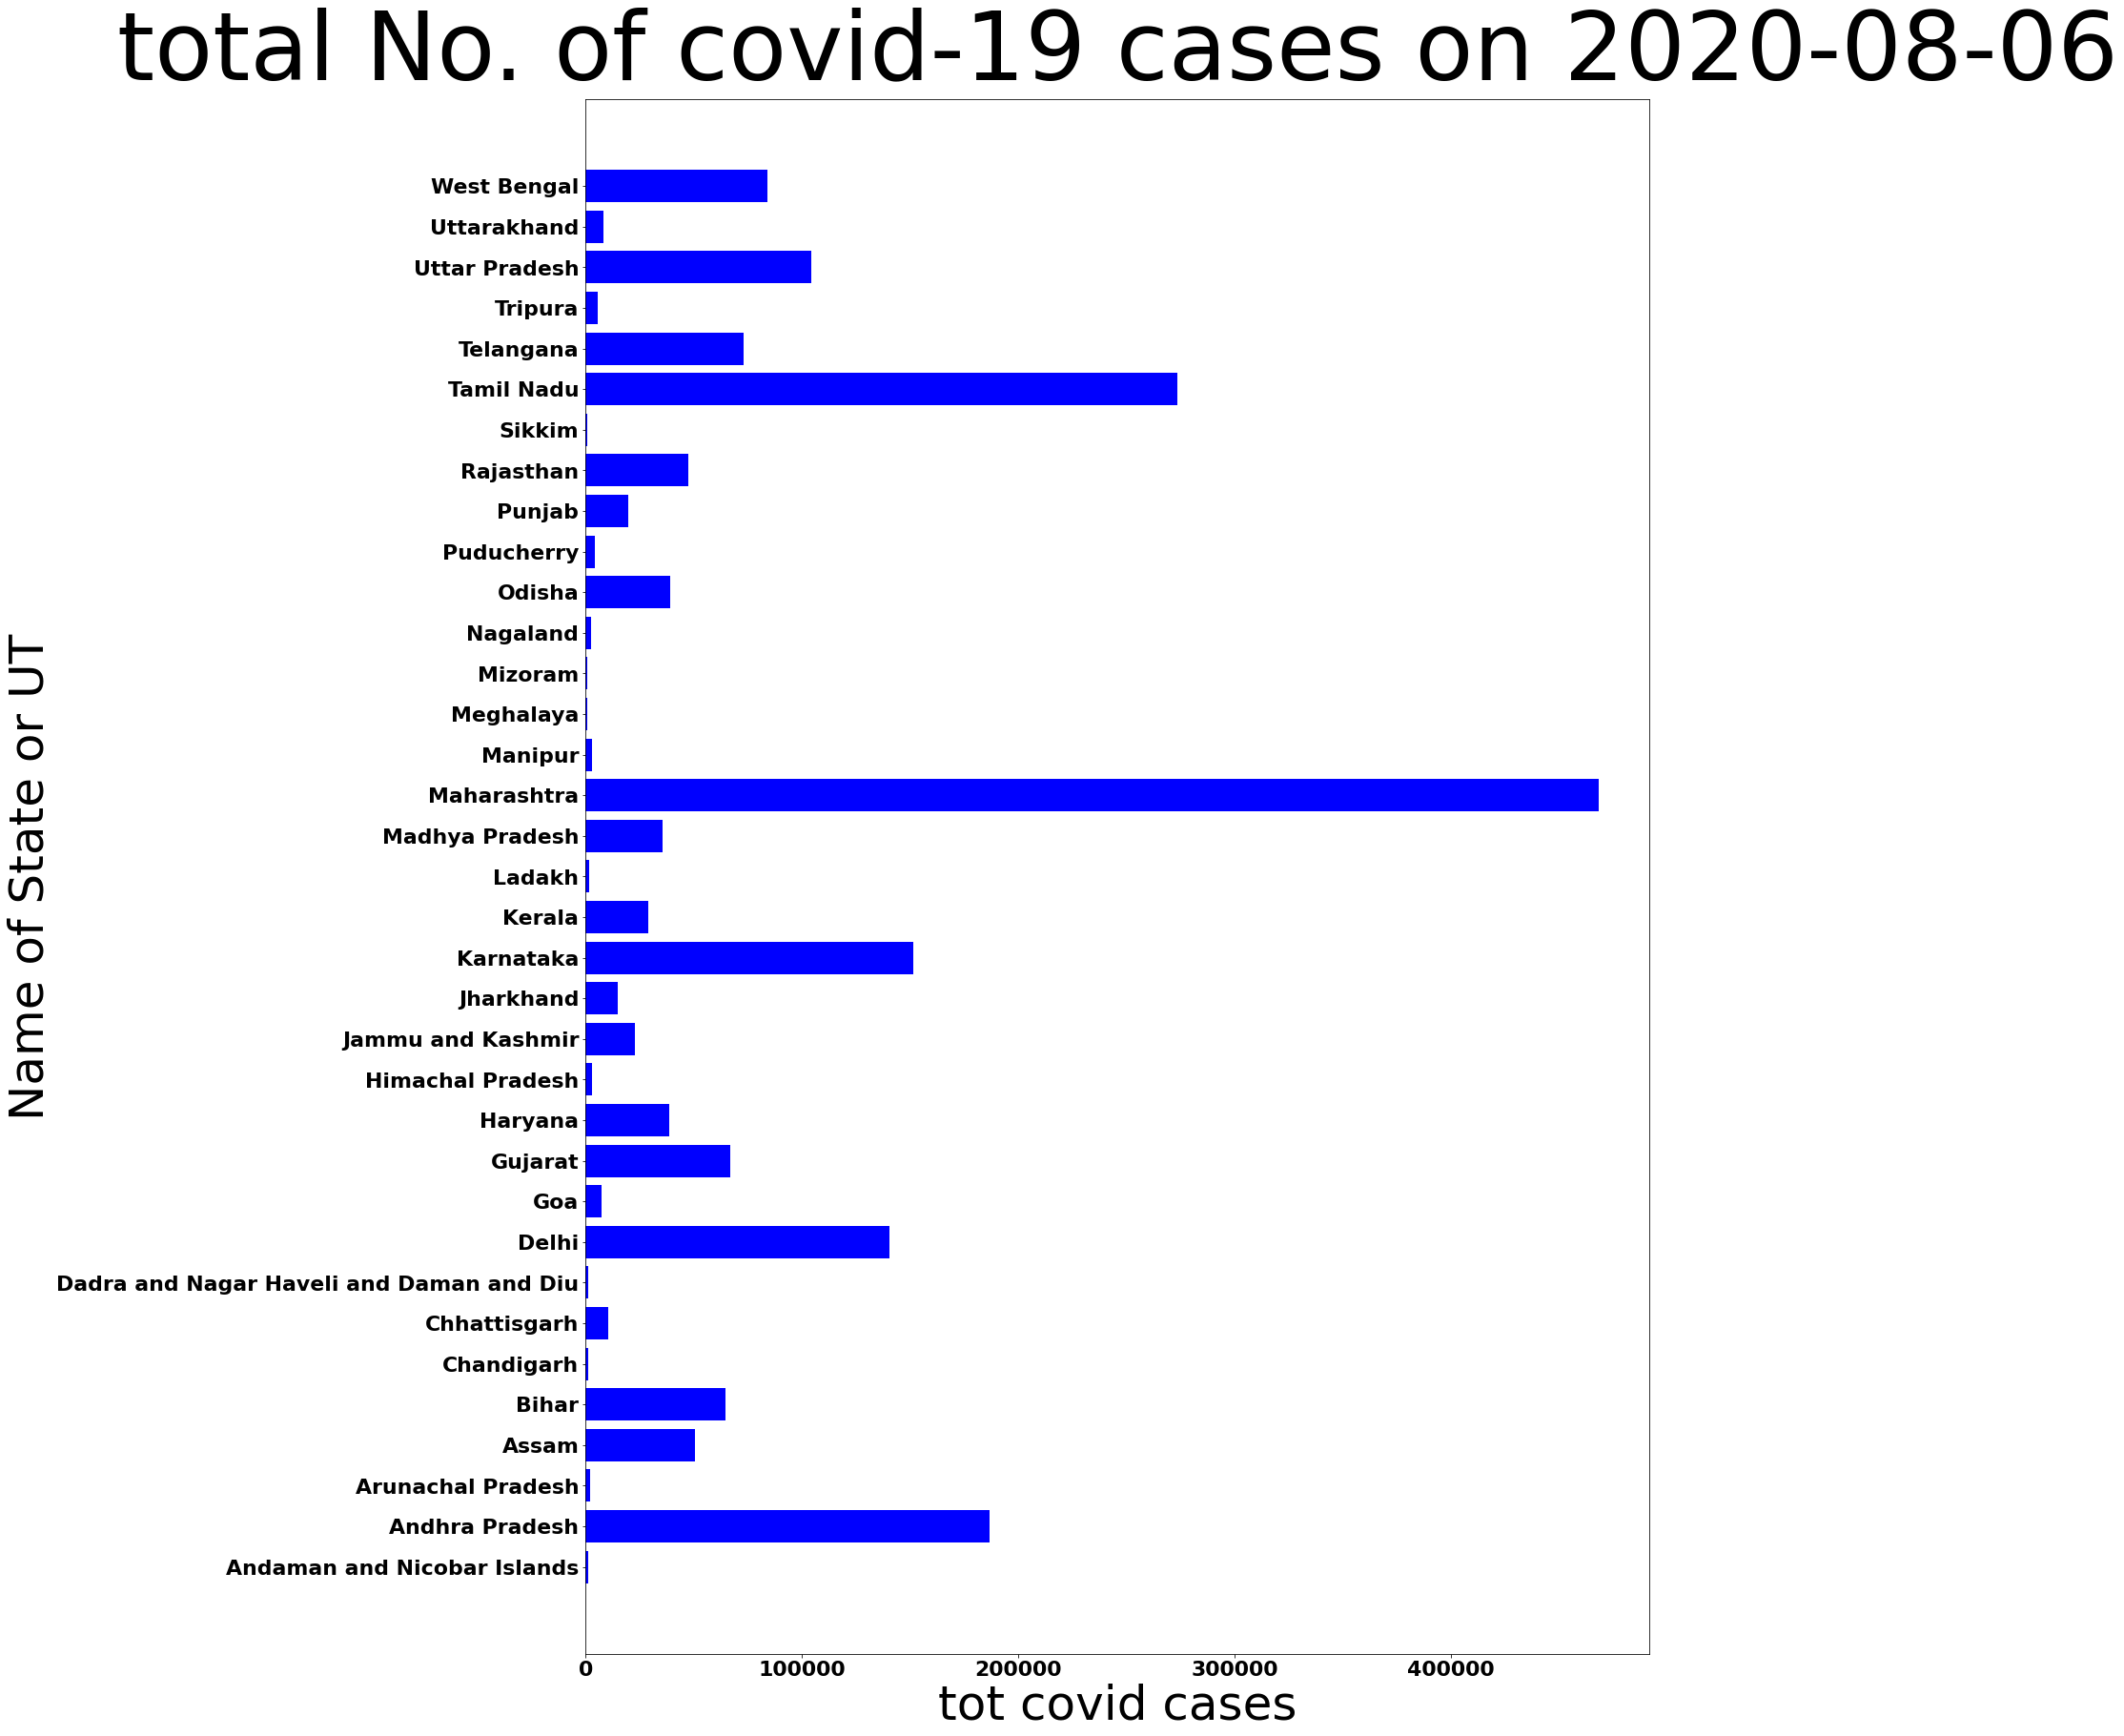

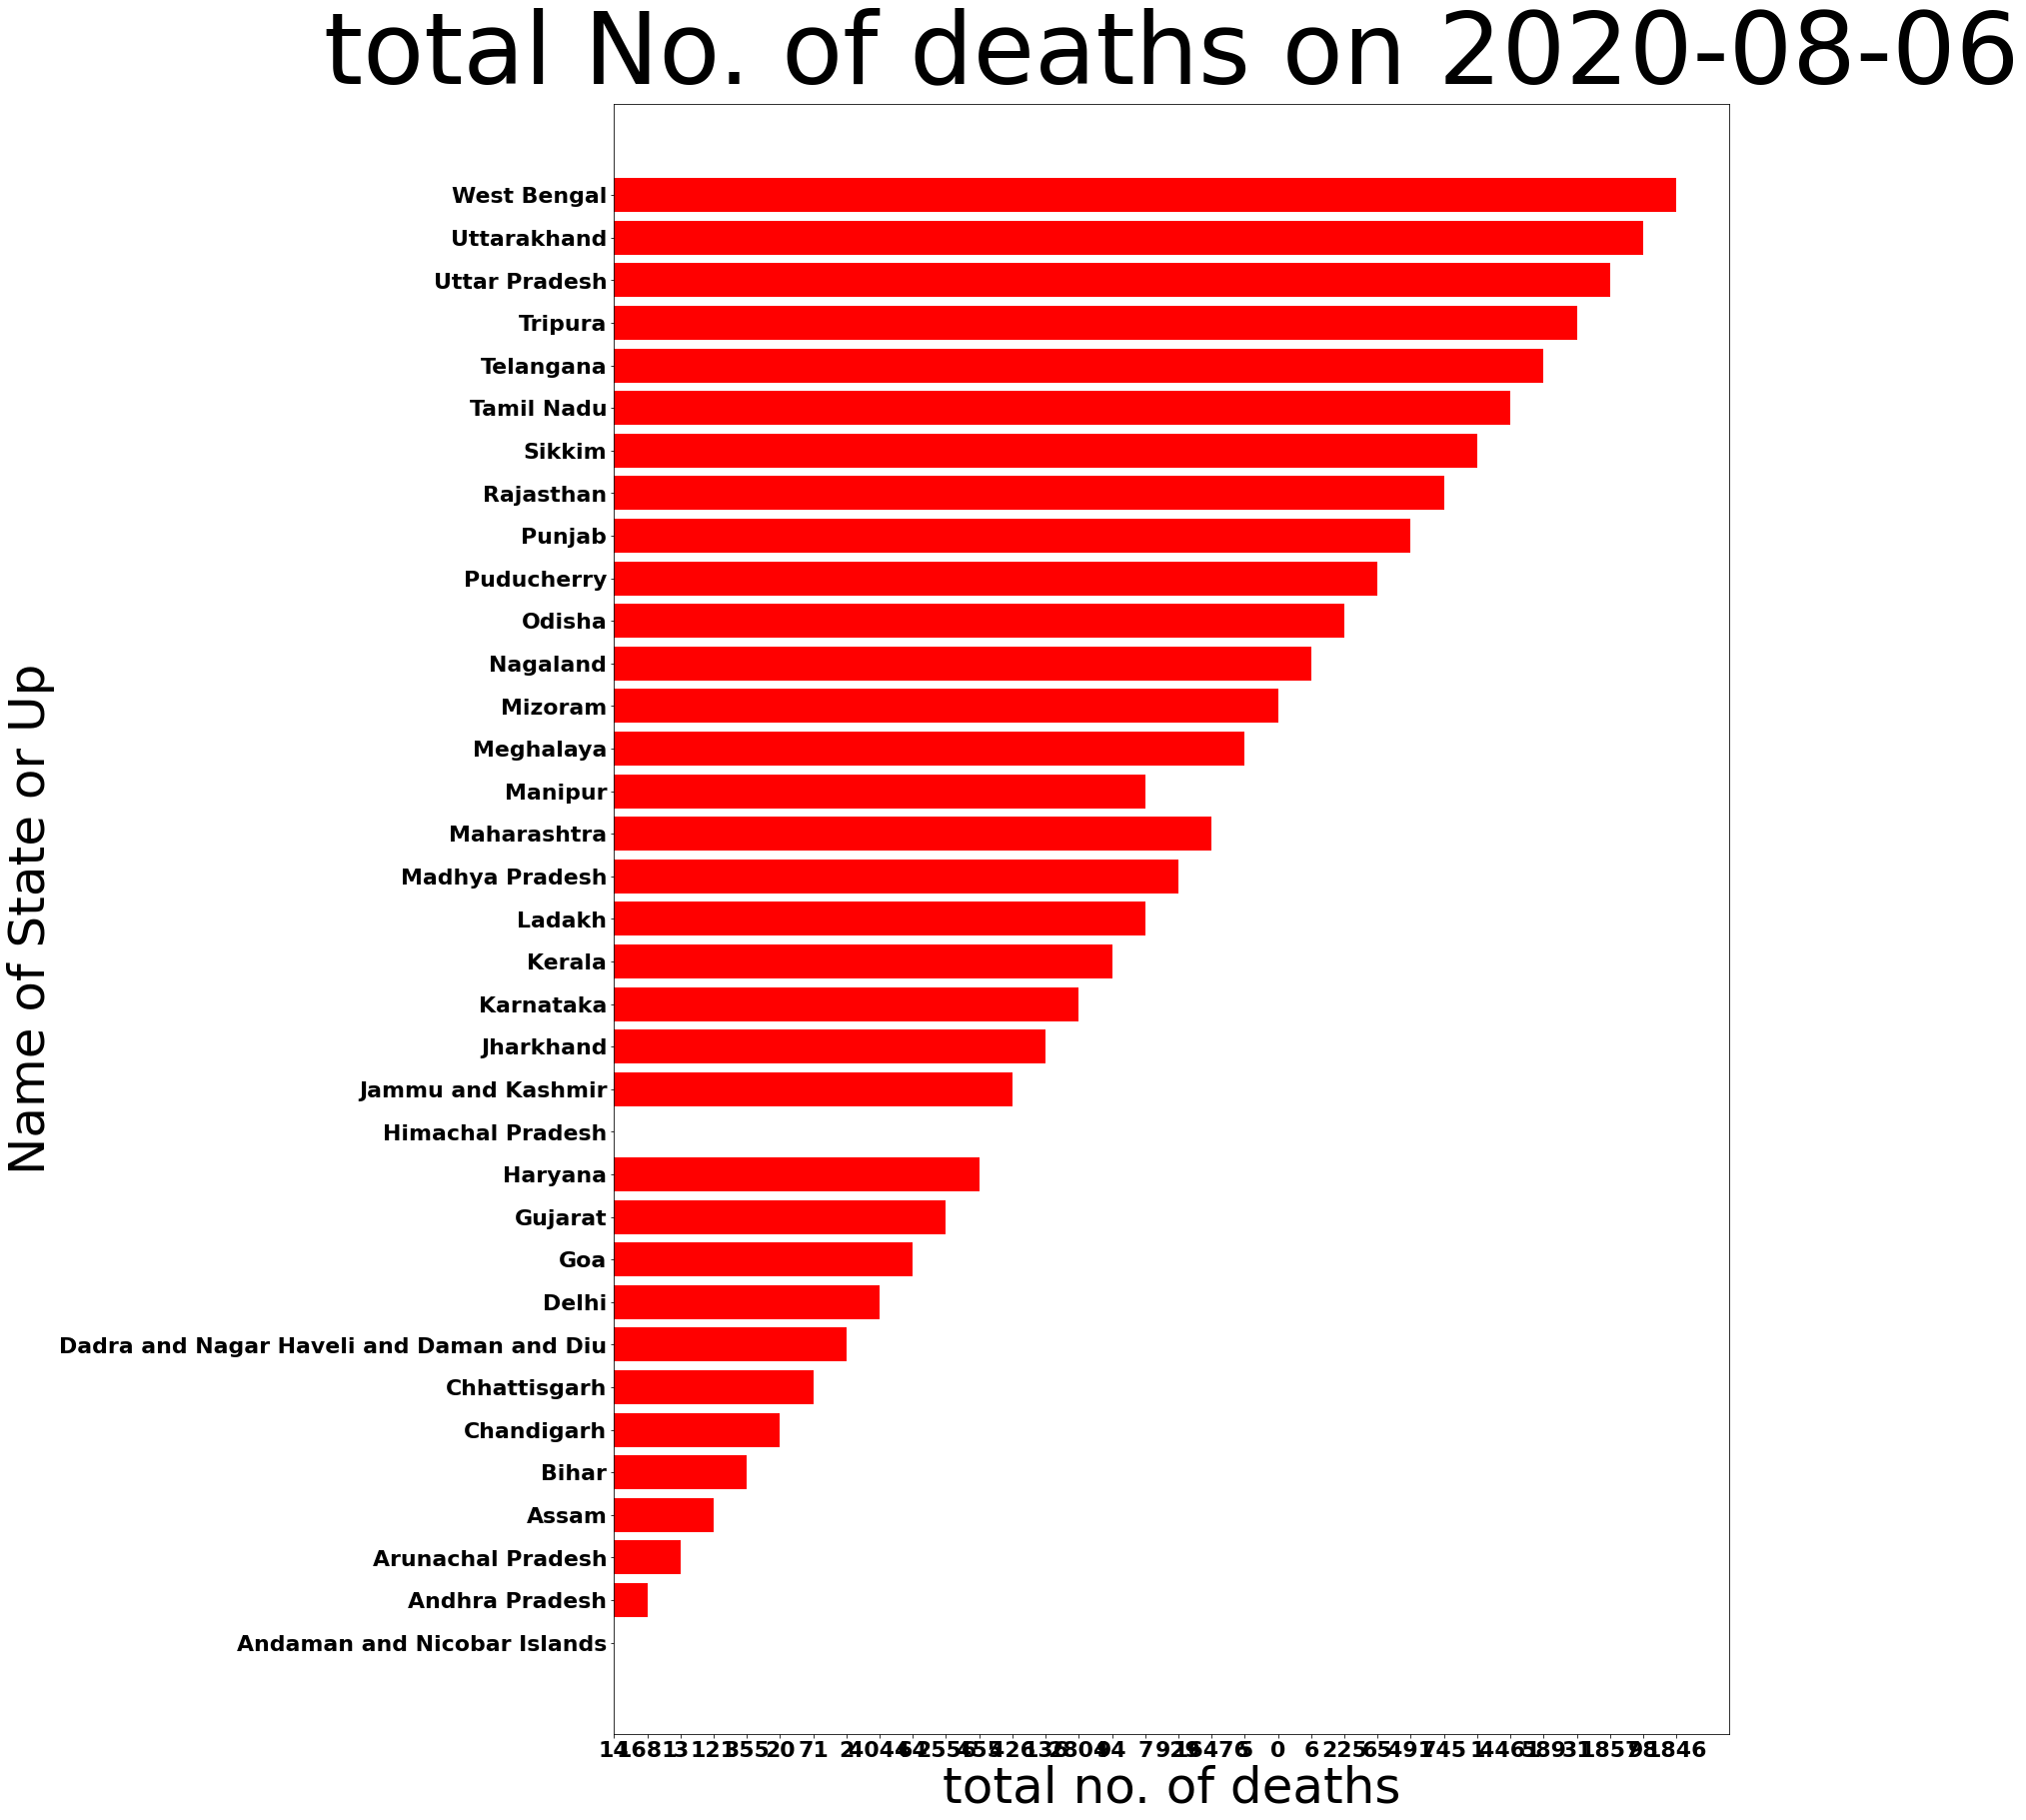

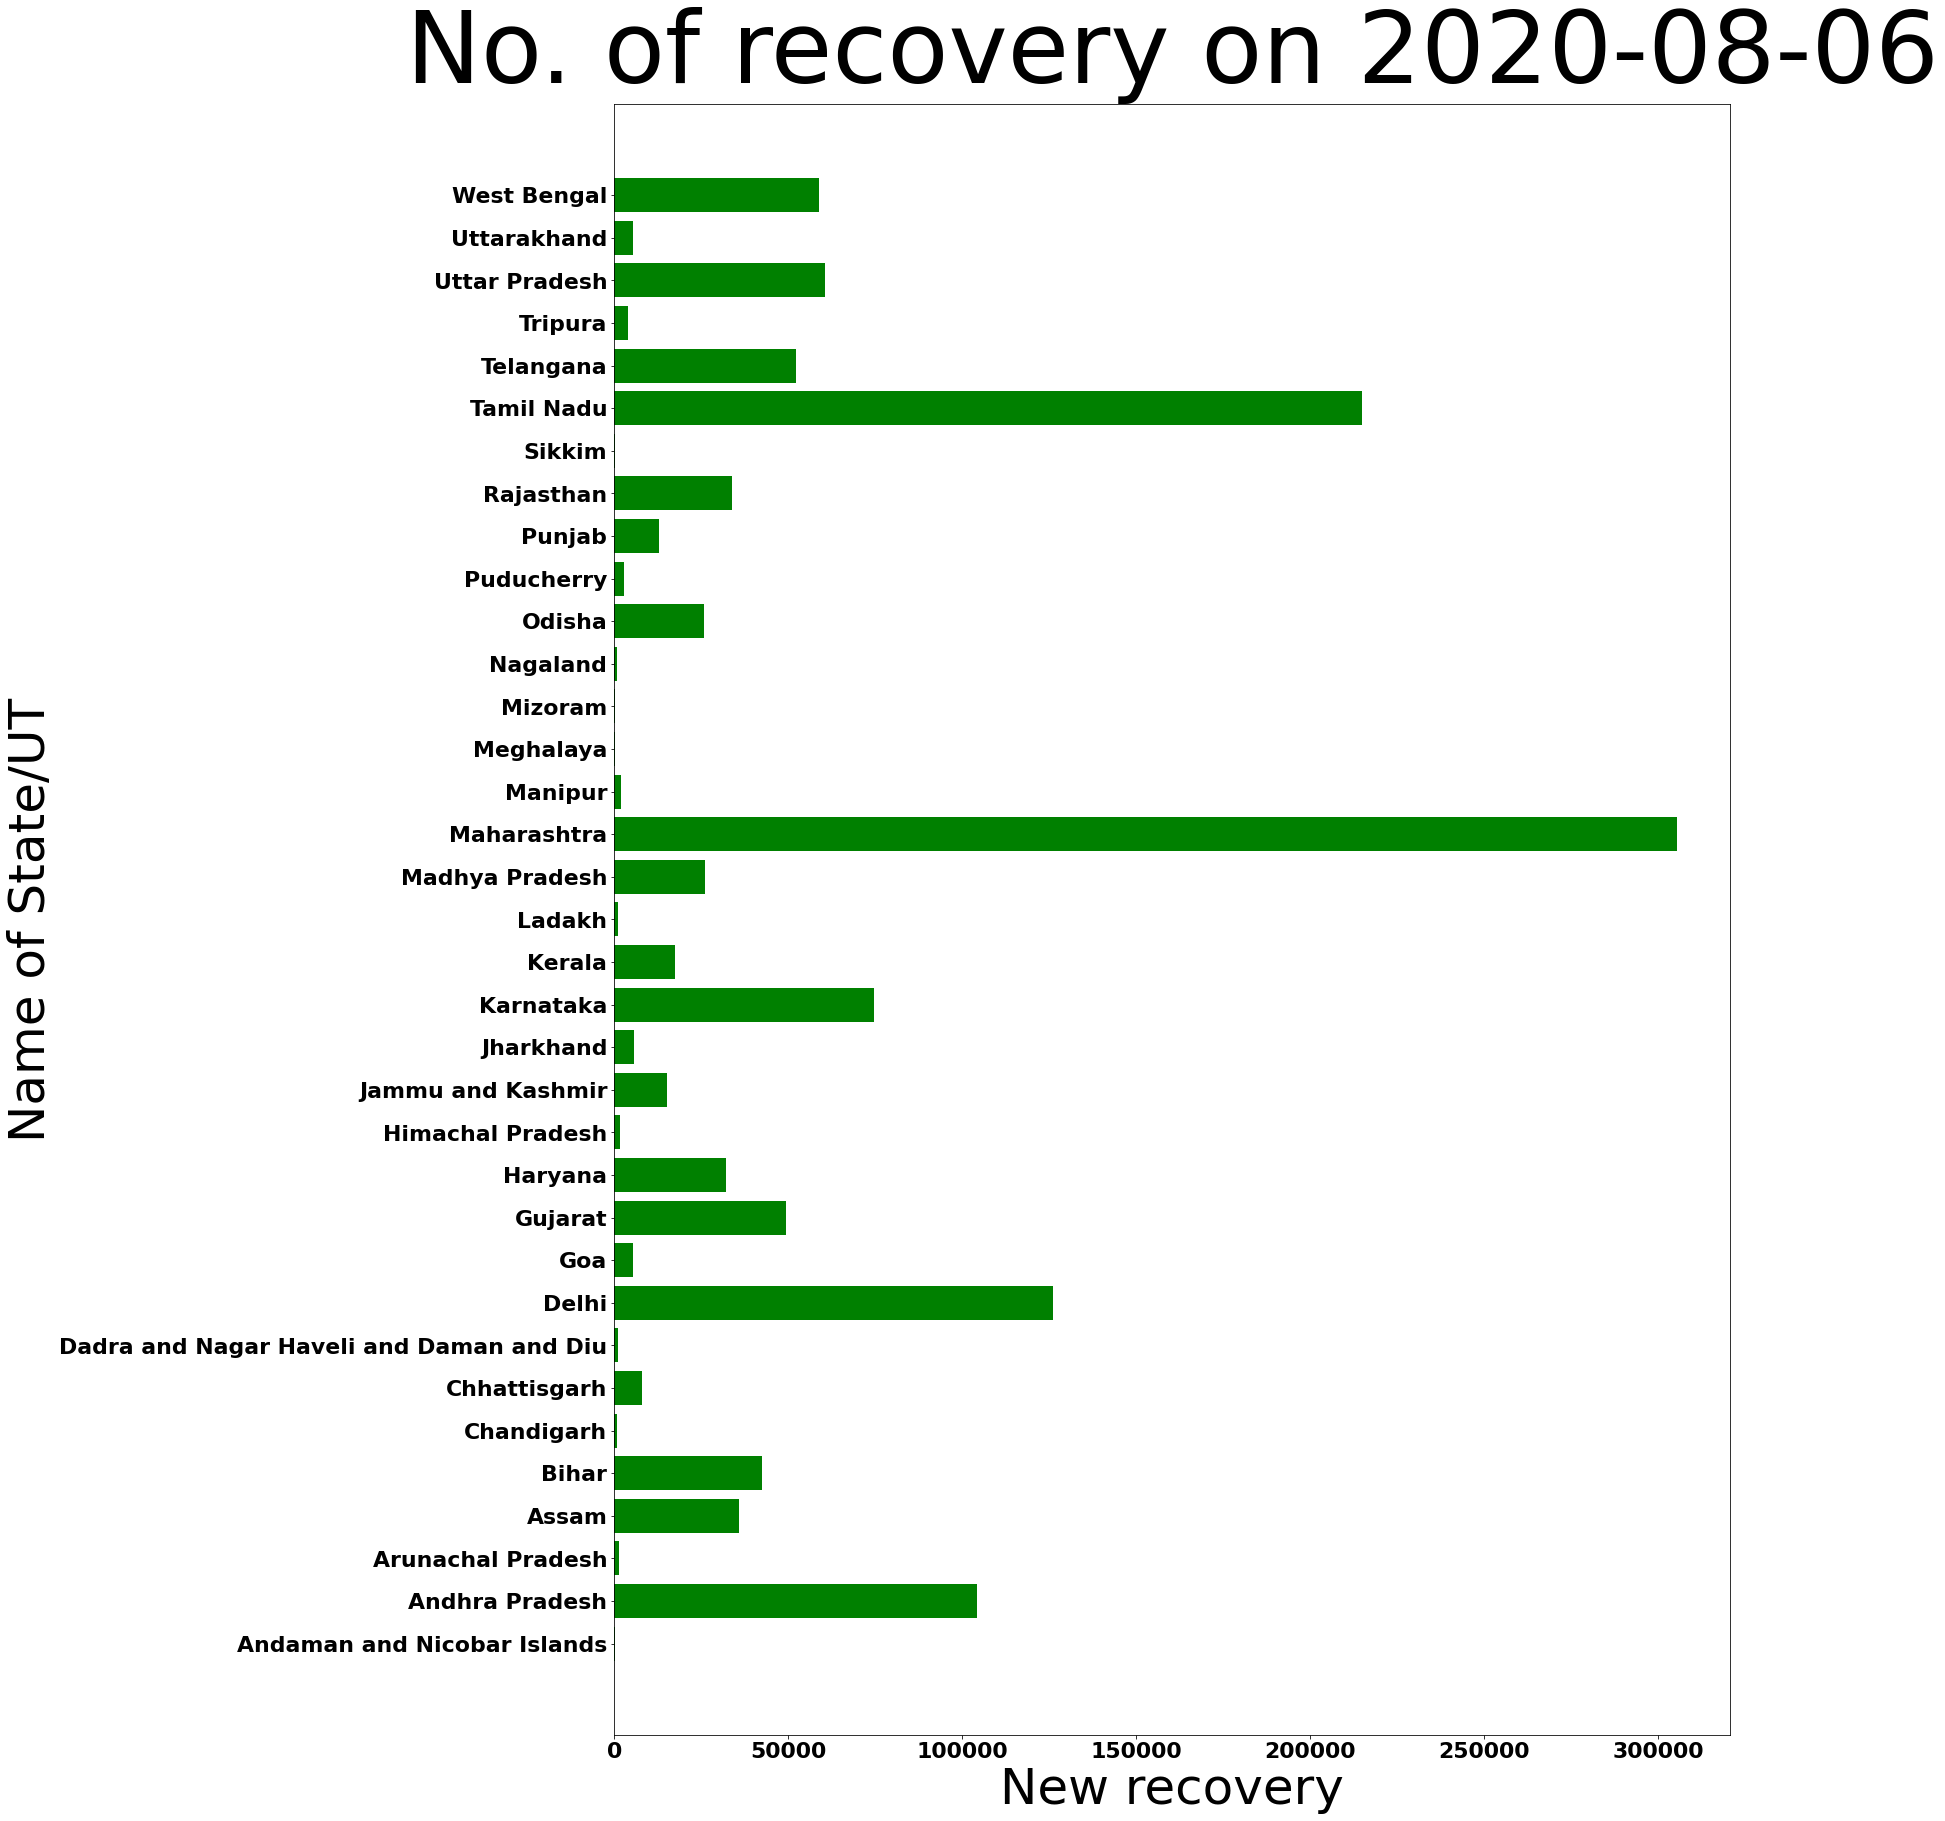

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
font = {'family' : 'normal',        'weight' : 'bold',
        'size'   : 22}
 
matplotlib.rc('font', **font)
plt.figure(figsize=(20,30))
plt.axes(xlabel="total cases",ylabel="states/ut",title="no. of cases(in the specified date)") 
import numpy as np
plt.barh(np.array(df3["Name of State / UT"]),np.array(df3["Total Confirmed cases"]),color="blue")
 
plt.ylabel("Name of State or UT",fontsize=50)
 
plt.xlabel("tot covid cases",fontsize=50)
 
plt.title("total No. of covid-19 cases on "+date,fontsize=100) 
plt.show()
 
plt.figure(figsize=(20,30))
plt.axes(xlabel="new deaths",ylabel="states/ut",title="no. of deaths") 
plt.barh(np.array(df3["Name of State / UT"]),np.array(df3["Death"]),color="red")
plt.xlabel("total no. of deaths",fontsize=50)
 
plt.ylabel("Name of State or Up",fontsize=50)
 
plt.title("total No. of deaths on "+date,fontsize=100)
plt.show()
 
plt.figure(figsize=(20,30))
plt.axes(xlabel="total recovery",ylabel="states/ut",title="recovery")
plt.barh(np.array(df3["Name of State / UT"]),np.array(df3["Cured/Discharged/Migrated"]), color="green") 
plt.ylabel("Name of State/UT",fontsize=50)
plt.xlabel("New recovery",fontsize=50)
plt.title("No. of recovery on "+date,fontsize=100) 
plt.show()

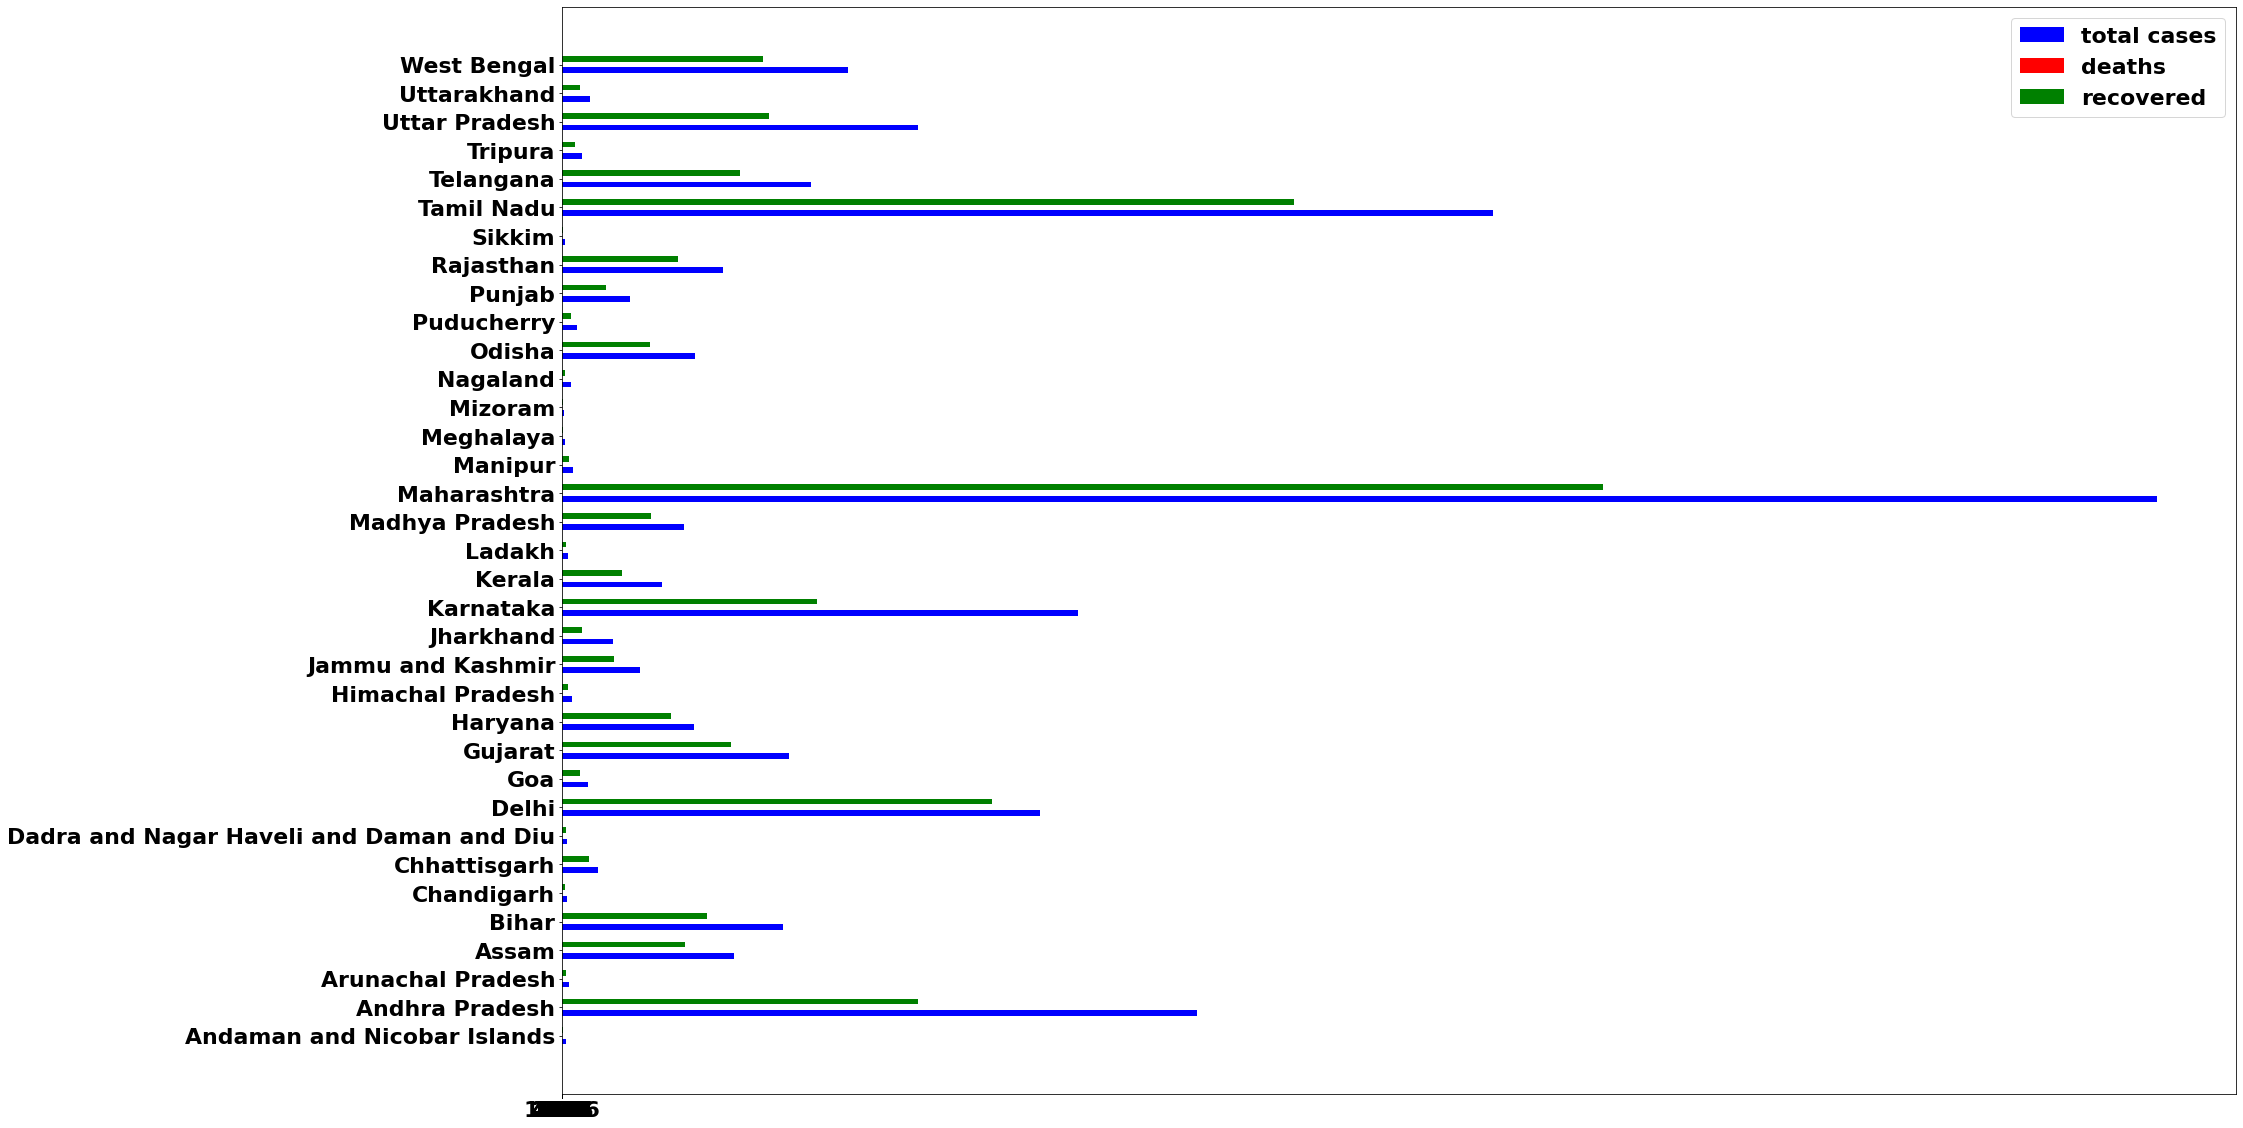

In [ ]:
plt.figure(figsize=(30,20))
o=len(np.array(df3["Name of State / UT"]))
index=np.arange(o)
a=np.array(df3["Total Confirmed cases"])
b=np.array(df3["Death"])
bar_width=0.2

c=np.array(df3["Cured/Discharged/Migrated"])
rects1 = plt.barh(index,a, bar_width,color='b',label='total cases')

rects2 = plt.barh(index + bar_width,b, bar_width,color='r',label='deaths')
rects3 = plt.barh(index +(2* bar_width),c, bar_width,color='g',label='recovered')
plt.yticks(index + bar_width,np.array(df3["Name of State / UT"]))
plt.legend()
plt.show()


In [ ]:
cases="high"#@param["high","medium","low"]{run:"auto"}
import folium
import numpy as np
 
df4=df3[['Latitude','Longitude','New cases']].iloc[:,:]
df4=np.array(df4)
a=folium.Map([22.98,87.855], zoom_start=4.1)
 
for l in df4:
  b=l[2]
  if cases=="low":
    if b<50:
      c="#007849"
      folium.CircleMarker([l[0],l[1]],color=c).add_to(a)
    else:
        continue
  elif cases=="medium":
    if b>=50 and b<500:
       c="#9ACD32"
       folium.CircleMarker([l[0],l[1]],color=c).add_to(a)
    else:
      continue

  else:
    if b>=500:
       c='#FF0000'
       folium.CircleMarker([l[0],l[1]],color=c).add_to(a)
  
 
a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_df = df[['location','date', 'new_cases_smoothed','new_deaths']]
new_df

,location,date,new_cases_smoothed,new_deaths
0,Afghanistan,2020-02-24,NaN,NaN
1,Afghanistan,2020-02-25,NaN,NaN
2,Afghanistan,2020-02-26,NaN,NaN
3,Afghanistan,2020-02-27,NaN,NaN
4,Afghanistan,2020-02-28,NaN,NaN
...,...,...,...,...
37153,Lebanon,2020-10-23,1195.143,7.0
37154,Lebanon,2020-10-24,1231.714,3.0
37155,Lebanon,2020-10-25,1300.571,3.0
37156,Lebanon,2020-10-26,1320.286,14.0


In [ ]:
new_df.shape

(37158, 4)

In [ ]:
data = new_df[new_df['location']=="India"]
data

,location,date,new_cases_smoothed,new_deaths
30070,India,2020-01-30,NaN,NaN
30071,India,2020-01-31,NaN,NaN
30072,India,2020-02-01,NaN,NaN
30073,India,2020-02-02,NaN,NaN
30074,India,2020-02-03,NaN,NaN
...,...,...,...,...
30467,India,2021-03-02,15620.000,98.0
30468,India,2021-03-03,15715.571,89.0
30469,India,2021-03-04,15752.857,113.0
30470,India,2021-03-05,16009.429,108.0


In [ ]:
data.shape

(402, 4)

In [ ]:
india = data.dropna()
india

,location,date,new_cases_smoothed,new_deaths
30111,India,2020-03-11,4.857,1.0
30112,India,2020-03-12,6.143,0.0
30113,India,2020-03-13,7.286,1.0
30114,India,2020-03-14,9.714,0.0
30115,India,2020-03-15,10.571,0.0
...,...,...,...,...
30467,India,2021-03-02,15620.000,98.0
30468,India,2021-03-03,15715.571,89.0
30469,India,2021-03-04,15752.857,113.0
30470,India,2021-03-05,16009.429,108.0


In [ ]:
india.rename(columns = {'new_cases_smoothed' : 'y','date':'ds','new_deaths':"z"},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
india
india['ds'] = pd.to_datetime(india['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
covid = india[["ds",'y']]

In [ ]:
covid2=india[["ds",'z']]
covid2.rename(columns = {'z':"y"},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 30111 to 30471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      361 non-null    datetime64[ns]
 1   y       361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.5 KB


In [ ]:
# The columns are not be in required format
# Convert ds to Timestamp Format
# Convert y to int format
 
 
covid['y'] = covid['y'].astype(int)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 30111 to 30471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      361 non-null    datetime64[ns]
 1   y       361 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.5 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


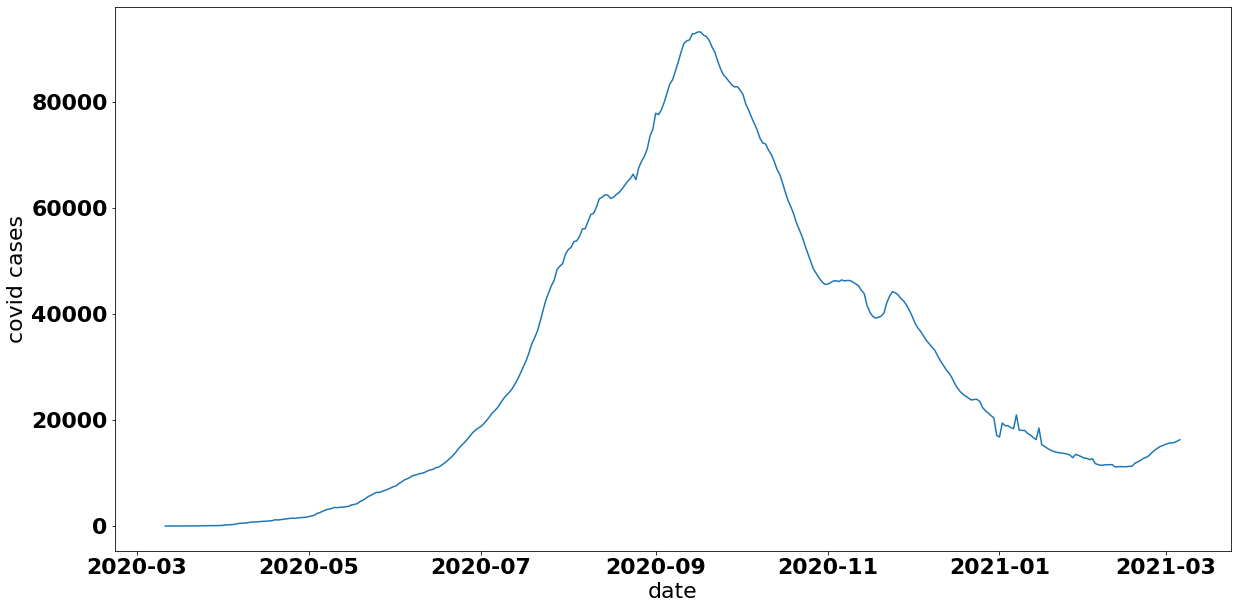

In [ ]:
import matplotlib.pyplot as plt
 
import plotly.express as px
plt.figure(figsize=(20,10))
plt.plot(covid['ds'],covid['y'])
plt.xlabel("date")
plt.ylabel("covid cases")

 
plt.show()

Text(0, 0.5, 'deaths')

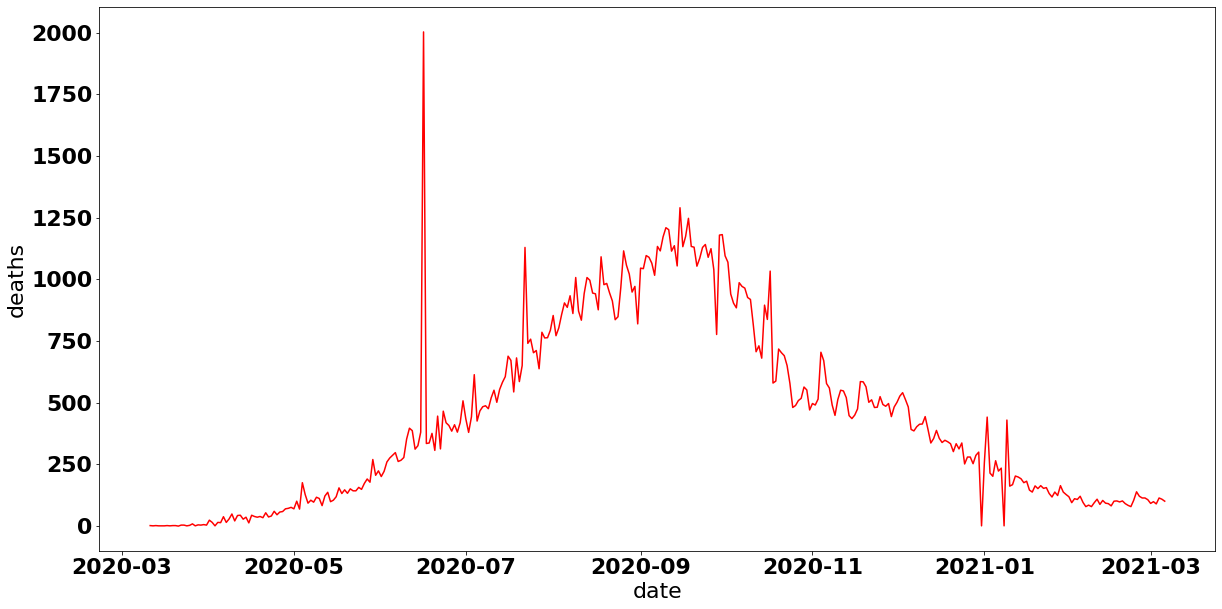

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(covid['ds'],covid2['y'], color="red")
plt.xlabel("date")
plt.ylabel("deaths")


In [ ]:
fig = px.bar(india, x="ds", y="y", color='y', orientation='v', height=600,
             title='new_cases_smoothed', color_discrete_sequence = px.colors.convert_to_RGB_255)
 
fig.update_layout(plot_bgcolor='rgb(100, 242, 100)')
fig.show()

In [ ]:
fig = px.bar(india, x="ds", y="z", color='z', orientation='v', height=600,
             title='deaths', color_discrete_sequence = px.colors.convert_to_RGB_255)
 
fig.update_layout(plot_bgcolor='rgb(100, 242, 100)')
fig.show()

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
# Fb Prophet
 
import fbprophet
op = fbprophet.Prophet()
op.fit(covid)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Fb Prophet
 
import fbprophet
op2= fbprophet.Prophet()
op2.fit(covid2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = op.make_future_dataframe(periods=365)
forecast=op.predict(future)

In [ ]:
future2 = op2.make_future_dataframe(periods=365)
forecast2=op2.predict(future2)
forecast2=forecast2[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-11,-1396.397482,-4879.676167,1933.997833
1,2020-03-12,-1305.629823,-4209.070905,1961.609791
2,2020-03-13,-1215.468916,-4269.144715,1880.234723
3,2020-03-14,-1105.953910,-4057.295059,1973.401233
4,2020-03-15,-1153.121004,-4392.639473,1886.451833
...,...,...,...,...
721,2022-03-02,-57770.634994,-344638.917247,197132.476697
722,2022-03-03,-57942.185829,-344264.012224,195160.499341
723,2022-03-04,-58114.343415,-347861.106242,196129.302166
724,2022-03-05,-58267.146904,-346523.164650,197875.569478


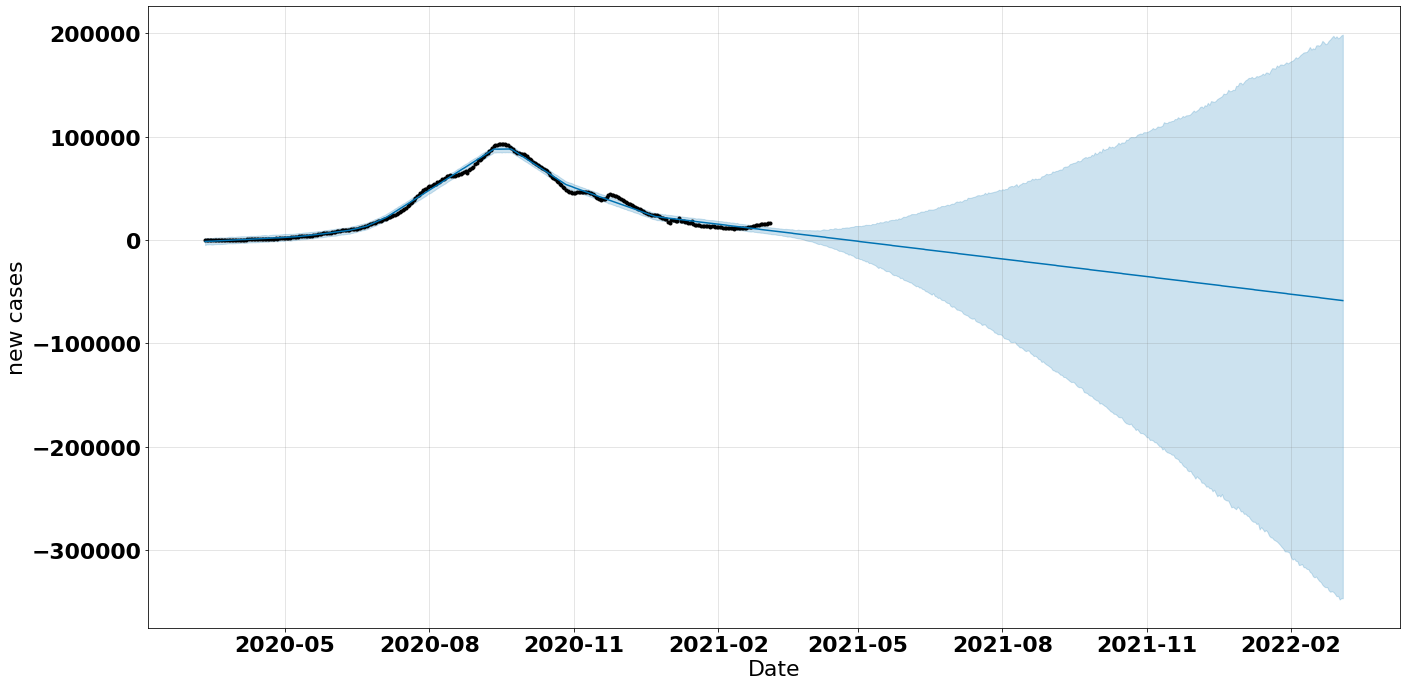

In [ ]:
 
 
op.plot(forecast,xlabel = 'Date',ylabel='new cases', figsize=(20,10));

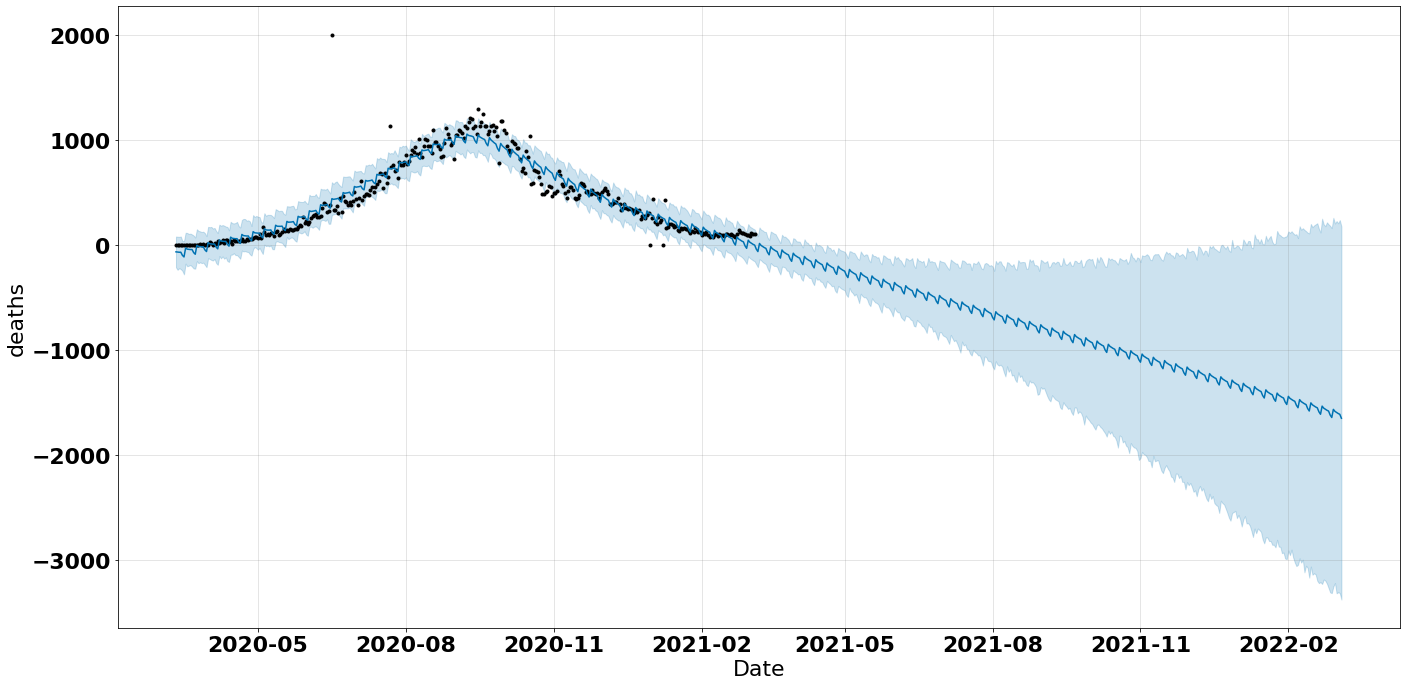

In [ ]:
op2.plot(forecast2,xlabel = 'Date',ylabel='deaths',figsize=(20,10));

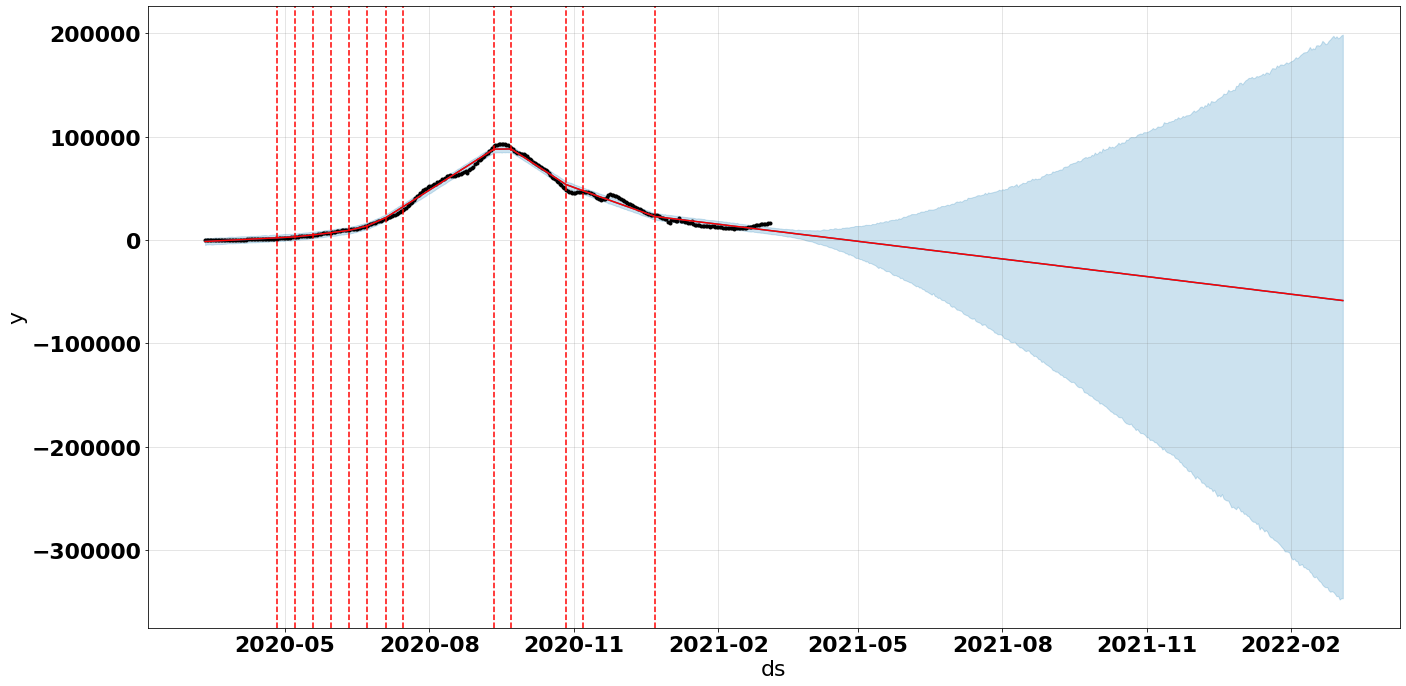

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = op.plot(forecast, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), op, forecast)